In [1]:
!pip install plotly

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [52]:
df_train=pd.read_csv('digit-recognizer/train.csv')

In [53]:
df_train.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [54]:
df_train.shape

(42000, 785)

In [55]:
df_train.sample(10)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
14078      2       0       0       0       0       0       0       0       0   
40458      8       0       0       0       0       0       0       0       0   
40630      8       0       0       0       0       0       0       0       0   
9672       5       0       0       0       0       0       0       0       0   
38236      2       0       0       0       0       0       0       0       0   
19328      8       0       0       0       0       0       0       0       0   
33225      6       0       0       0       0       0       0       0       0   
637        8       0       0       0       0       0       0       0       0   
8012       1       0       0       0       0       0       0       0       0   
37275      8       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
14078       0  ...         0         0         0         0         0   
40458       0  ...         0         0         0         0         0   
40630       0  ...         0         0         0         0         0   
9672        0  ...         0         0         0         0         0   
38236       0  ...         0         0         0         0         0   
19328       0  ...         0         0         0         0         0   
33225       0  ...         0         0         0         0         0   
637         0  ...         0         0         0         0         0   
8012        0  ...         0         0         0         0         0   
37275       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
14078         0         0         0         0         0  
40458         0         0         0         0         0  
40630         0         0         0         0         0  
9672          0         0         0         0         0  
38236         0         0         0         0         0  
19328         0         0         0         0         0  
33225         0         0         0         0         0  
637           0         0         0         0         0  
8012          0         0         0         0         0  
37275         0         0         0         0         0  

[10 rows x 785 columns]

In [56]:
data_20855= df_train.iloc[20855]
data_20855

label       6
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 20855, Length: 785, dtype: int64

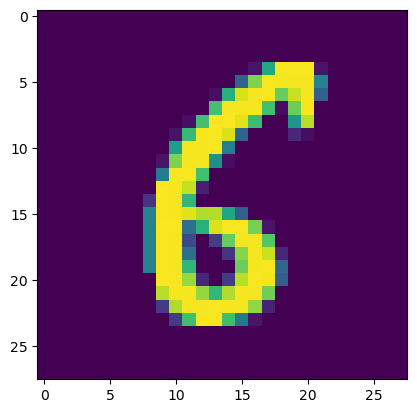

In [57]:
plt.imshow(data_20855[1:].values.reshape(28,28))

In [59]:
X = df_train.drop( columns = ['label'], axis = 1)
y = df_train['label']

In [11]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
X_train.shape

(33600, 784)

In [61]:
scaler= StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [62]:
pca= PCA(n_components=2)

In [63]:
X_train_pca= pca.fit_transform(X_train)
X_test_pca= pca.transform(X_test)

In [64]:
X_test_pca.shape

(8400, 2)

In [65]:
y_train_pca= y_train.astype(str)

In [66]:
fig= px.scatter(x= X_train_pca[:,0],
                y=X_train_pca[:,1],
                color=y_train_pca,
                color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

### For 3D Visualization using plotly

In [67]:
pca= PCA(n_components=3)
X_train_pca= pca.fit_transform(X_train)
X_test_pca= pca.transform(X_test)

y_train_pca= y_train.astype(str)



In [68]:
fig= px.scatter_3d(x=X_train_pca[:,0], y=X_train_pca[:,1], z=X_train_pca[:,2], color=y_train_pca)
fig.update_layout( margin=dict(l=20, r=20, t=20, b=20))
fig.show()

Eigen Value

In [69]:
pca.explained_variance_

array([40.67111198, 29.17023393, 26.74459569])

Eigen Vector

In [70]:
pca.components_

array([[ 1.15393010e-17, -6.62517712e-19, -1.78323838e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 2.85337598e-17,  2.86388437e-18, -1.21416211e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-1.69582485e-16,  3.00840101e-18, -1.98971435e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [71]:
pca.components_.shape

(3, 784)

### How to find out optimum number of PCA required for particular model?

Eigen values are representing that how much variance of total is explained by that particular PCA. We have to check that how much varience is explained by each Eigen value. We have to consider the eigne values so that the sum of minimum should be 90% of the total varience. Percentage of varience explained by the the eigen value should be 90%

In [72]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

Above are the perccentage of ratios of 3 eigen values of the total varience

### Let's Calculate the PCA without any limit to get the 90% varience of the total from all the PCA's

In [73]:
pca= PCA(n_components=None)
X_train_pca= pca.fit_transform(X_train)
X_test_pca= pca.transform(X_test)



In [74]:
pca.explained_variance_.shape

(784,)

In [75]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [76]:
pca.components_.shape

(784, 784)

### Lets calculate the cumlative sum on all explained_variance_ratio_

In [77]:
cummulative_sum = np.cumsum(pca.explained_variance_ratio_)



## Lets plot this

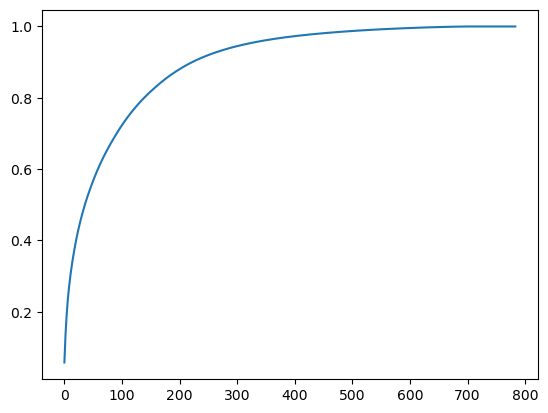

In [78]:
plt.plot(cummulative_sum)

In [81]:
px.line(cummulative_sum)

From Above plot we can see that there is a point where line change almost straintline and that is the point where we have to take that number of Components to make the model accuract